In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
from notebook_network_size import find_best_network_size_notebook, try_best_network_sizes
from train_single_network import train_single_network
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
data = []
with open('../SOD_MC_DATA.dat', 'r') as inputfile:
    for l in inputfile:
        data.append([float(x) for x in l.split(',')])
data = np.array(data)

parameters = data[:,:6]
samples = data[:,6:]

In [3]:
epochs = 500000
network = [10, 10, 10, 10, 10,1]

# Network sizes


Config 4 x 6 ([0 x 0] / [3 x 3])
Training and postprocessing took: 7.951957702636719 seconds (0.13253262837727864 minutes) (0.0022088771396213108 hours)
Config 4 x 12 ([0 x 1] / [3 x 3])
Training and postprocessing took: 25.19356870651245 seconds (0.41989281177520754 minutes) (0.0069982135295867925 hours)
Config 4 x 24 ([0 x 2] / [3 x 3])
Training and postprocessing took: 24.312772750854492 seconds (0.4052128791809082 minutes) (0.00675354798634847 hours)
Config 8 x 6 ([1 x 0] / [3 x 3])
Training and postprocessing took: 28.03360390663147 seconds (0.46722673177719115 minutes) (0.007787112196286519 hours)
Config 8 x 12 ([1 x 1] / [3 x 3])
Training and postprocessing took: 42.66274642944336 seconds (0.711045773824056 minutes) (0.0118507628970676 hours)
Config 8 x 24 ([1 x 2] / [3 x 3])
Training and postprocessing took: 83.2975845336914 seconds (1.3882930755615235 minutes) (0.02313821792602539 hours)
Config 16 x 6 ([2 x 0] / [3 x 3])
Training and postprocessing took: 89.51917695999146 seco

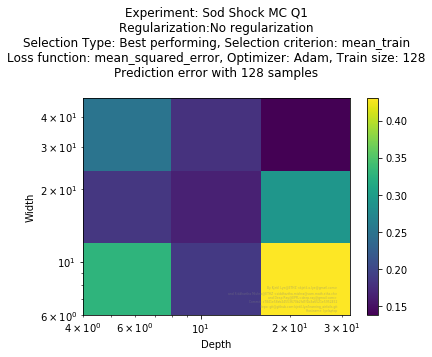

Memory usage: 1501452
all_errors_map[Error mean]=\ 
[[0.21418245 0.10646924 0.14804177]
 [0.13834464 0.0504906  0.15880462]
 [0.38242223 0.26786357 0.11339549]]


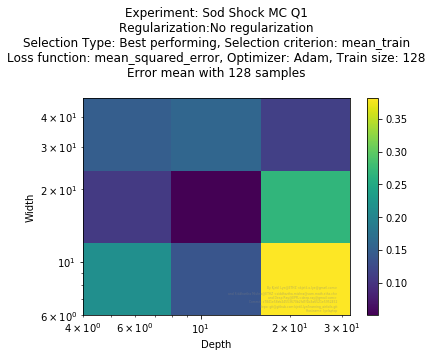

Memory usage: 1501452
all_errors_map[Error variance]=\ 
[[6.62303327 4.25848955 8.10192536]
 [1.03261871 2.02966468 0.53224772]
 [1.22062763 0.72367161 0.75163259]]


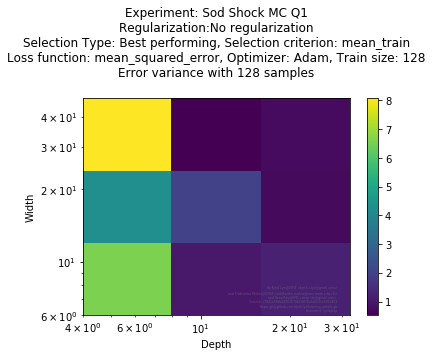

Memory usage: 1501452
all_errors_map[Wasserstein]=\ 
[[0.15574954 0.086767   0.12459848]
 [0.09764354 0.04384429 0.1100997 ]
 [0.26662234 0.18601041 0.07849257]]


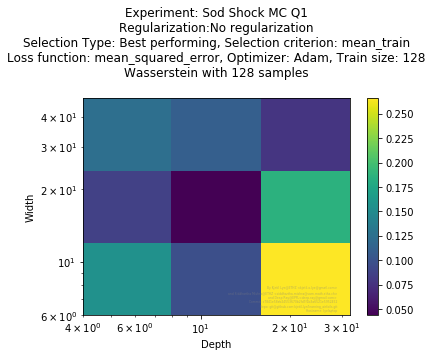

Memory usage: 1501452
all_errors_map[Selection error (mean_train)]=\ 
[[17.00302055  9.12597459 13.45002146]
 [13.70830339  6.47722968 13.38561901]
 [33.76861222 24.27308965 10.96939828]]


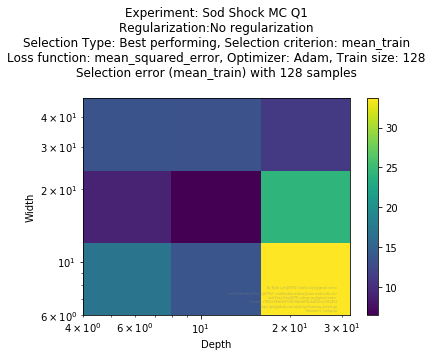

Memory usage: 1501452


/usr/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


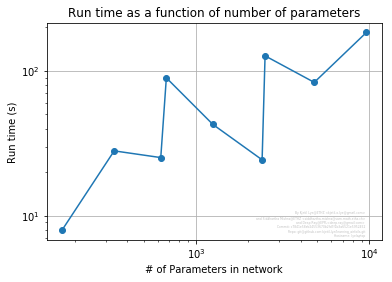

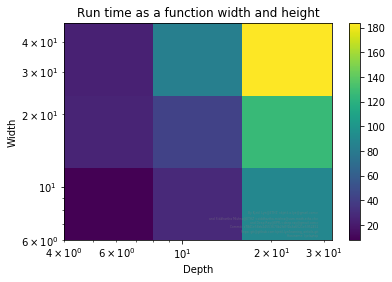

/usr/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


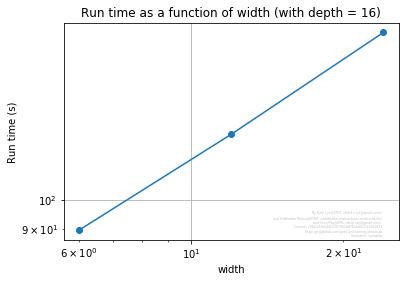

/usr/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


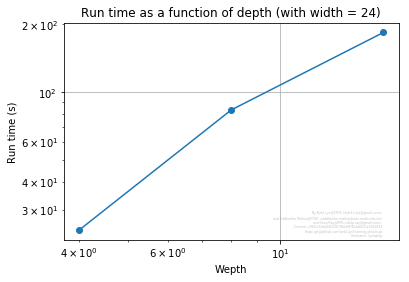

Config 4 x 6 ([0 x 0] / [3 x 3])


KeyboardInterrupt: 

In [4]:
func_names=['Q1', 'Q2', 'Q3']

for n, func_name in enumerate(func_names):
    display(HTML("<h1>%s</h1>"% func_name))
    try_best_network_sizes(parameters=parameters, 
                           samples=samples[:,n], 
                           base_title='Sod Shock MC %s' % func_name,
                          epochs=epochs)

# Single network


Training took 14.680833578109741 seconds


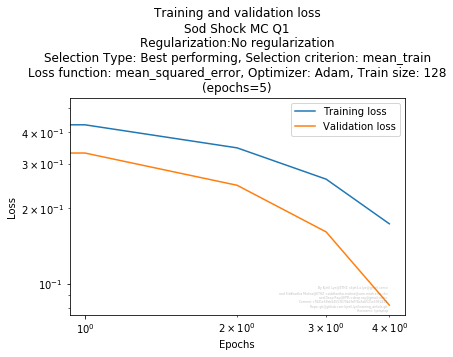


Training took 13.733263731002808 seconds


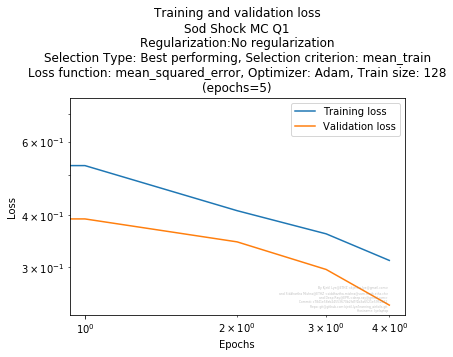


Training took 13.2106773853302 seconds


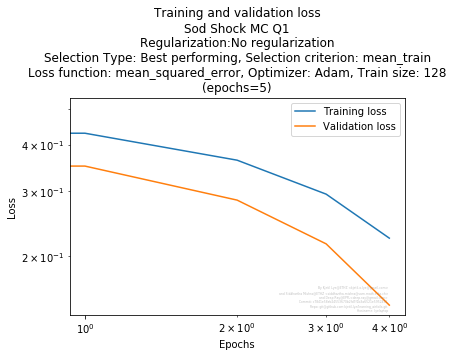

Best network index: 0
Total learning time took: 121 s


#############################################################################################
#SodShockMCQ1_Noregularization_Bestperforming_mean_train_mean_squared_error_Adam_128_network#
#############################################################################################
-----  ----  ----------
Layer  Size  Parameters
0      10    70
1      10    110
2      10    110
3      10    110
4      10    110
5      1     11
Sum          521
-----  ----  ----------
#############################################################################################


Training took 35.05176115036011 seconds


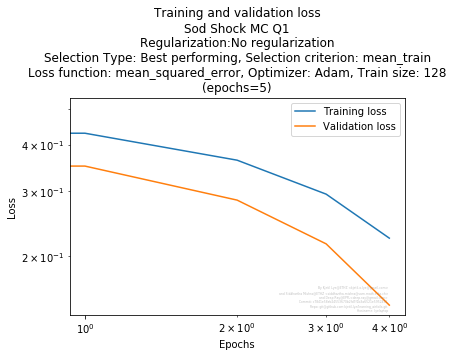

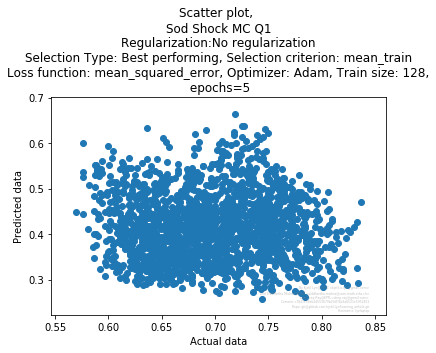

Number of parameters: 521


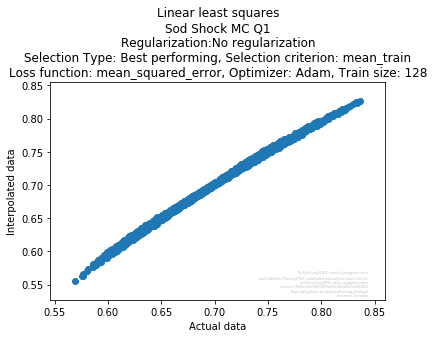

(2000,)
(2000, 6)


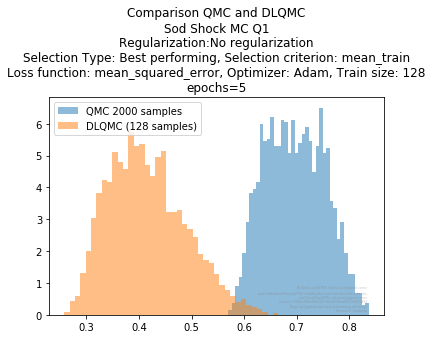

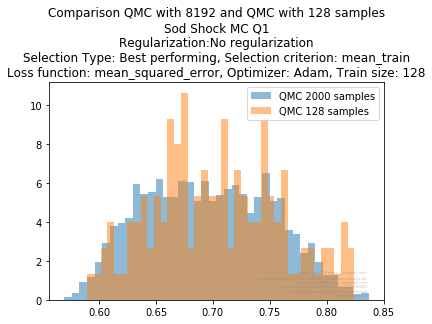

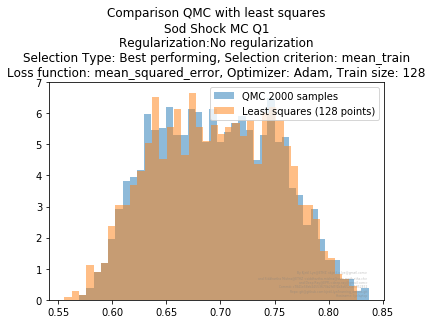

Memory usage: 1689400
Memory usage: 1689400


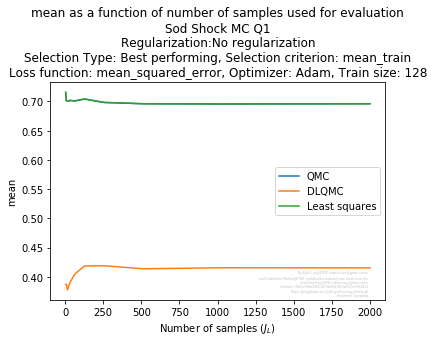

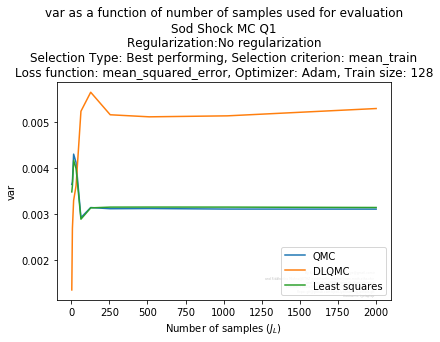

Memory usage: 1689400


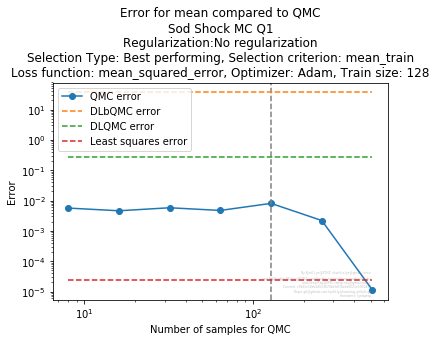

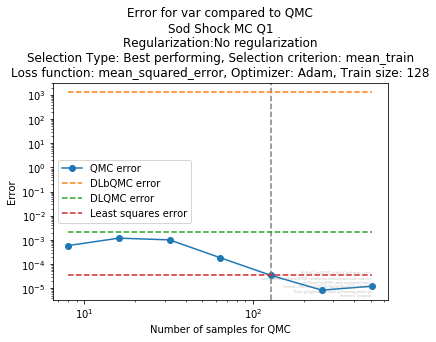

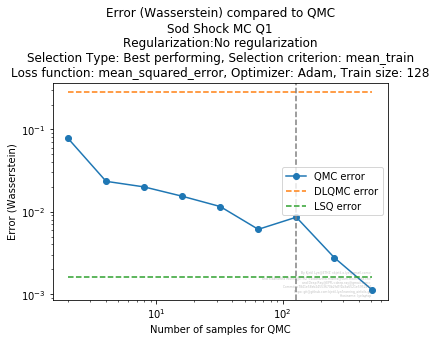

{"main_error": 0.4033037918337983, "variance_error": 0.700762509218587, "wasserstein_error": 0.2802838373267651, "selection_error": 37.97271141801444}


###################################################################################################
#SodShockMCQ1_Noregularization_Bestperforming_mean_train_mean_squared_error_Adam_128_speedup_table#
###################################################################################################
  -------  -------  -------------------  --------------------  ----------------------  ----------------------  ------------------  ------------------
  QMC 128  QMC 128  DLQMC                DLQMC                 DLbQMC                  DLbQMC                  Least squares       Least squares
  mean     var      mean                 var                   mean                    var                     mean                var
Sod Shock MC Q1
Regularization:No regularization
Selection Type: Best performing, Selection criterion: mean_train
Los


Training took 18.33629322052002 seconds


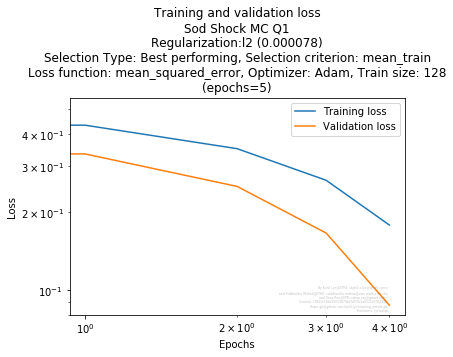


Training took 14.189289093017578 seconds


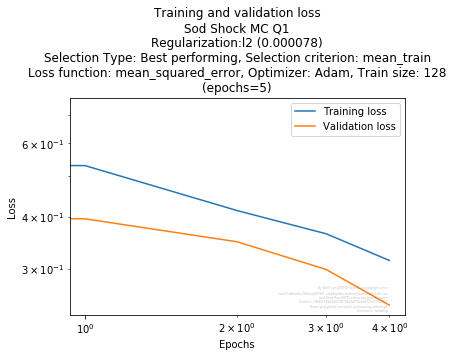

KeyboardInterrupt: 

In [5]:
func_names=['Q1', 'Q2', 'Q3']


for n, func_name in enumerate(func_names):
    display(HTML("<h1>%s</h1>"% func_name))
    train_single_network(parameters=parameters, 
                         samples=samples[:,n], 
                         base_title='Sod Shock MC %s' % func_name,
                         network = network,
                         epochs=epochs, 
                         large_integration_points = None)